In [1]:
#pip install pandas

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
#pip install scikit_posthocs

In [4]:
#pip install seaborn

In [5]:
from scikit_posthocs import posthoc_dunn

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
import scipy.stats as stats

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [42]:
from math import log

Load into dataframes

BVIRUS

bvirus - Contains only VIRUSES filtered from bigtable

In [10]:
bvirus = pd.read_csv('all.bigtable.virus.tsv.gz', compression='gzip', header=0, sep='\t')
bvirus #check if there

,seqID,sampleID,count,CPM,alnType,targetID,evalue,pident,fident,nident,...,taxMethod,kingdom,phylum,class,order,family,genus,species,baltimoreType,baltimoreGroup
0,ERR1163130:1:335952,ERR1163130,1,2.034427,aa,A0A1B1IVR3,6.767000e-12,81.0,0.810,30,...,LCA,Viruses,unclassified Viruses phylum,unclassified Viruses class,unclassified Viruses order,unclassified Viruses family,unclassified Viruses genus,uncultured Mediterranean phage,NaN,NaN
1,ERR1163130:1:335970,ERR1163130,1,2.034427,aa,B5TA67,1.893000e-12,83.7,0.837,31,...,LCA,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Myoviridae,unclassified Myoviridae genus,Burkholderia phage KS10,dsDNA,I
2,ERR1163130:1:335994,ERR1163130,1,2.034427,aa,A0A516LPG6,3.260000e-15,89.1,0.891,33,...,LCA,Viruses,unclassified Viruses phylum,unclassified Viruses class,unclassified Viruses order,unclassified Viruses family,unclassified Viruses genus,Prokaryotic dsDNA virus sp.,NaN,NaN
3,ERR1158211:12:97127,ERR1158211,12,26.003519,aa,A0A6B9J9N2,6.299000e-14,100.0,1.000,33,...,TopHit,Viruses,Hofneiviricota,Faserviricetes,Tubulavirales,Inoviridae,unclassified Inoviridae genus,Pseudomonas phage pf8_ST274-AUS411,ssDNA,II
4,ERR1158211:1:112033,ERR1158211,1,2.166960,aa,A0A481V2Q7,8.034000e-13,100.0,1.000,33,...,TopHit,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Casadabanvirus,Pseudomonas phage vB_Pae_BR58b,dsDNA,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452163,SRR6865467:1:69095,SRR6865467,1,3.782205,nt,tid|2664399|MN270269.1,8.081000e-73,98.6,0.986,0,...,LCA,Viruses,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,unclassified Siphoviridae genus,unclassified Siphoviridae species,dsDNA,I
11452164,SRR687875:2:11822,SRR687875,2,34.465526,nt,tid|35277|DD160220.1,2.254000e-44,98.0,0.980,0,...,LCA,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,unclassified Retroviridae genus,unclassified Retroviridae species,ssRNA-RT,VI
11452165,SRR687875:1:12051,SRR687875,1,17.232763,nt,tid|11801|M16686.1,2.618000e-14,100.0,1.000,0,...,LCA,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,unclassified Retroviridae genus,unclassified Retroviridae species,ssRNA-RT,VI
11452166,SRR687875:2:12282,SRR687875,2,34.465526,nt,tid|11676|MK458165.1,5.459000e-16,90.6,0.906,0,...,TopHit,Viruses,Artverviricota,Revtraviricetes,Ortervirales,Retroviridae,Lentivirus,Human immunodeficiency virus 1,ssRNA-RT,VI


In [11]:
# fliter
bvirusfilt = bvirus[(bvirus.alnType=='aa') & (bvirus.evalue<1e-20)]
# group ***
bvirusfiltgroup = bvirusfilt.groupby(by=['sampleID', 'family'], as_index=False).agg('sum','normCount')
bvirusfiltgroup

,sampleID,family,count,CPM,evalue,pident,fident,nident,mismatches,qcov,tcov,qstart,qend,qlen,tstart,tend,tlen,alnlen,bits
0,DRR046624,Flaviviridae,2,6172.839506,1.691000e-26,100.0,1.000,48,0,0.954,0.192,2,145,151,109,156,250,144,108
1,DRR092712,Ackermannviridae,5,10.324392,9.509602e-22,375.9,3.759,290,92,4.549,0.905,848,453,1261,1674,2051,2386,1146,633
2,DRR092712,Autographiviridae,30,61.946354,8.968275e-21,2242.5,22.425,1739,519,27.866,8.497,4284,2945,7072,4845,7099,13100,6855,3694
3,DRR092712,Herelleviridae,1,2.064878,8.003000e-32,58.8,0.588,53,37,0.985,0.354,3,272,274,50,139,254,270,126
4,DRR092712,Marseilleviridae,7,14.454149,2.614539e-22,475.5,4.755,383,170,6.558,1.720,675,1245,1807,1750,2305,3429,1710,849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20490,SRR7755274,Phycodnaviridae,1,2.017463,3.914000e-22,95.8,0.958,46,2,1.000,0.623,1,144,144,28,75,77,144,96
20491,SRR7755274,Podoviridae,1,2.017463,7.594000e-23,82.9,0.829,39,8,0.986,0.103,143,3,143,307,353,457,141,98
20492,SRR7755274,Retroviridae,1,2.017463,3.178000e-24,100.0,1.000,47,0,0.979,0.125,142,2,144,64,110,375,141,102
20493,SRR7755274,Siphoviridae,24,48.419116,3.178936e-20,1936.8,19.368,941,128,21.502,3.019,1215,2070,3281,4946,5993,9667,3207,2125


In [12]:
# rename 'family' to 'category'
bvirusfiltgroup.rename(columns = {'family':'category'}, inplace = True)
# add prefix
dataFrameV = bvirusfiltgroup
dataFrameV.category = 'hecatomb_' + dataFrameV.category
# selection
fbvirus = dataFrameV[['sampleID', 'category', 'CPM']]

# number of unique sampleID (number of samples being used)
len(fbvirus.sampleID.unique())

fbvirus

,sampleID,category,CPM
0,DRR046624,hecatomb_Flaviviridae,6172.839506
1,DRR092712,hecatomb_Ackermannviridae,10.324392
2,DRR092712,hecatomb_Autographiviridae,61.946354
3,DRR092712,hecatomb_Herelleviridae,2.064878
4,DRR092712,hecatomb_Marseilleviridae,14.454149
...,...,...,...
20490,SRR7755274,hecatomb_Phycodnaviridae,2.017463
20491,SRR7755274,hecatomb_Podoviridae,2.017463
20492,SRR7755274,hecatomb_Retroviridae,2.017463
20493,SRR7755274,hecatomb_Siphoviridae,48.419116


In [13]:
# Overview of Virus by family, summing CPM in each family/category
virusOV = fbvirus.groupby(by=['category'], as_index=False)['CPM'].agg('sum')
virusOV

,category,CPM
0,hecatomb_Ackermannviridae,6.508575e+04
1,hecatomb_Adenoviridae,3.293615e+05
2,hecatomb_Adintoviridae,2.422186e+02
3,hecatomb_Alloherpesviridae,8.648342e+01
4,hecatomb_Alphaflexiviridae,1.297030e+04
...,...,...
119,hecatomb_unclassified Pisuviricota family,6.510322e+01
120,hecatomb_unclassified Sobelivirales family,2.641052e+00
121,hecatomb_unclassified Tolivirales family,1.401056e+01
122,hecatomb_unclassified Tymovirales family,1.994434e+03


In [14]:
# plot - direct use from hecatomb tut (have changed fig size) - need to add a cut off
# sns.set_style("darkgrid")
#sns.set_palette("colorblind")
# sns.set(rc={'figure.figsize':(20,15)})
# sns.stripplot(x="category",
                    # y="CPM",
                    # data=virusOV, jitter=0.5)

# plt.legend(bbox_to_anchor=(6.0,1), loc=0, borderaxespad=2,ncol=6, shadow=True, labelspacing=1.5, borderpad=1.5)
# plt.show()

In [15]:
# virusOV *WRONG* sns.catplot(x="category", kind="CPM", palette="ch:.25", data=virusOV)

In [16]:
# fbvirus *WRONG* - counts the amount of time it appears? not sum amount* sns.catplot(x="category", kind="count", palette="ch:.25", data=fbvirus)

In [17]:
#extracting the greatest 20 values CPM from virusOV
large20=virusOV.nlargest(20, "CPM")
large20
# Note - very high CPM of herpesviridae - issue with mistaking other viruses as herpesvirus? - should we try removing, or comment on this issue in viromics? 
# ^ look at quality of samples, false positives - see notes (on paper)
# This is the total CPM of each category/family - should we be lookin at the number of hits of each category across the group? as some samples may be saturated with particular families
# ^ what is here is good for an overall eval. Looking at the CPM of category in each sample - e.g. bubble plot in hecatomb tut. 
# Needs formating
# herpes and retrovirus - possible false positives

,category,CPM
46,hecatomb_Herpesviridae,2.457089e+07
93,hecatomb_Siphoviridae,4.992591e+06
90,hecatomb_Retroviridae,3.257798e+06
62,hecatomb_Myoviridae,2.157004e+06
81,hecatomb_Podoviridae,1.631504e+06
123,hecatomb_unclassified Viruses family,1.343039e+06
69,hecatomb_Papillomaviridae,1.154471e+06
7,hecatomb_Anelloviridae,1.032915e+06
59,hecatomb_Microviridae,8.527361e+05
89,hecatomb_Reoviridae,6.753298e+05


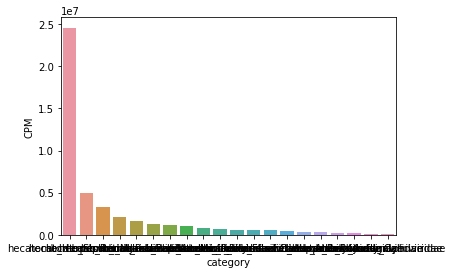

In [18]:
#highest 20 CPM counts for category across samples
ax=sns.barplot(x="category", y="CPM", data=large20, errwidth=0)

In [19]:
# investigating quality of contigs - and false positives (in the 'large20')
# Use filitered data - bvirusfilt
# group
FPvirus = bvirusfilt.groupby(by=['family', 'targetID'], as_index=False).agg('sum','normCount')
FPvirus

,family,targetID,count,CPM,evalue,pident,fident,nident,mismatches,qcov,tcov,qstart,qend,qlen,tstart,tend,tlen,alnlen,bits
0,Ackermannviridae,A0A075E089,4,8.158121,4.164000e-43,91.5,0.915,76,7,0.996,0.051,1,249,250,148,230,1612,249,158
1,Ackermannviridae,A0A075E155,43,87.699797,5.721565e-35,585.7,5.857,459,11,5.640,1.829,506,930,1500,734,1198,1542,1410,986
2,Ackermannviridae,A0A076YKP6,1,2.134804,7.333000e-24,64.4,0.644,49,27,0.996,0.226,1,228,229,95,170,336,228,102
3,Ackermannviridae,A0A076YKY8,7,14.178393,2.221490e-21,408.9,4.089,195,44,4.936,0.857,430,308,726,241,475,1395,717,482
4,Ackermannviridae,A0A0A0YQZ4,1,2.534128,5.101000e-22,87.2,0.872,41,6,0.979,0.107,3,143,144,129,175,440,141,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131567,unclassified Viruses family,X5CVV0,27,78.524566,5.562589e-21,1487.8,14.878,825,6,14.840,4.219,990,1542,2520,915,1731,2955,2493,1720
131568,unclassified Viruses family,X5DB22,57,124.461285,1.524466e-20,3724.6,37.246,1992,149,39.302,10.874,3205,3364,6531,1823,3924,7880,6423,4442
131569,unclassified Viruses family,X5DD34,3,6.080221,3.270580e-23,193.9,1.939,96,3,1.967,0.547,5,300,302,96,193,362,297,205
131570,unclassified Viruses family,X5DD51,348,827.682347,7.765936e-20,17867.6,178.676,9286,239,179.703,48.377,15084,14106,29137,15659,25001,36051,28575,20142


In [20]:
# rename 'family' to 'category'
FPvirus.rename(columns = {'family':'category'}, inplace = True)
# add prefix
pFPvirus = FPvirus
pFPvirus.category = 'hecatomb_' + pFPvirus.category
pFPvirus

,category,targetID,count,CPM,evalue,pident,fident,nident,mismatches,qcov,tcov,qstart,qend,qlen,tstart,tend,tlen,alnlen,bits
0,hecatomb_Ackermannviridae,A0A075E089,4,8.158121,4.164000e-43,91.5,0.915,76,7,0.996,0.051,1,249,250,148,230,1612,249,158
1,hecatomb_Ackermannviridae,A0A075E155,43,87.699797,5.721565e-35,585.7,5.857,459,11,5.640,1.829,506,930,1500,734,1198,1542,1410,986
2,hecatomb_Ackermannviridae,A0A076YKP6,1,2.134804,7.333000e-24,64.4,0.644,49,27,0.996,0.226,1,228,229,95,170,336,228,102
3,hecatomb_Ackermannviridae,A0A076YKY8,7,14.178393,2.221490e-21,408.9,4.089,195,44,4.936,0.857,430,308,726,241,475,1395,717,482
4,hecatomb_Ackermannviridae,A0A0A0YQZ4,1,2.534128,5.101000e-22,87.2,0.872,41,6,0.979,0.107,3,143,144,129,175,440,141,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131567,hecatomb_unclassified Viruses family,X5CVV0,27,78.524566,5.562589e-21,1487.8,14.878,825,6,14.840,4.219,990,1542,2520,915,1731,2955,2493,1720
131568,hecatomb_unclassified Viruses family,X5DB22,57,124.461285,1.524466e-20,3724.6,37.246,1992,149,39.302,10.874,3205,3364,6531,1823,3924,7880,6423,4442
131569,hecatomb_unclassified Viruses family,X5DD34,3,6.080221,3.270580e-23,193.9,1.939,96,3,1.967,0.547,5,300,302,96,193,362,297,205
131570,hecatomb_unclassified Viruses family,X5DD51,348,827.682347,7.765936e-20,17867.6,178.676,9286,239,179.703,48.377,15084,14106,29137,15659,25001,36051,28575,20142


In [21]:
# printing category of the top 20 CPM
large20["category"]

46                         hecatomb_Herpesviridae
93                          hecatomb_Siphoviridae
90                          hecatomb_Retroviridae
62                            hecatomb_Myoviridae
81                           hecatomb_Podoviridae
123          hecatomb_unclassified Viruses family
69                      hecatomb_Papillomaviridae
7                          hecatomb_Anelloviridae
59                          hecatomb_Microviridae
89                            hecatomb_Reoviridae
76                        hecatomb_Picornaviridae
37                          hecatomb_Flaviviridae
105     hecatomb_unclassified Caudovirales family
108    hecatomb_unclassified Herpesvirales family
43                        hecatomb_Hepadnaviridae
1                           hecatomb_Adenoviridae
84                        hecatomb_Polyomaviridae
74                       hecatomb_Phycodnaviridae
13                     hecatomb_Autographiviridae
21                         hecatomb_Caliciviridae


In [22]:
# selection
FFPvirus = pFPvirus[['targetID', 'category', 'CPM']]
blah=FFPvirus[FFPvirus['category'].isin(large20["category"])]
blah

,targetID,category,CPM
667,A0A024LNR3,hecatomb_Adenoviridae,38.319837
668,A0A059U5F6,hecatomb_Adenoviridae,2.299554
669,A0A060ILR9,hecatomb_Adenoviridae,1969.001539
670,A0A060IMX8,hecatomb_Adenoviridae,173.190163
671,A0A075IKT9,hecatomb_Adenoviridae,3.617016
...,...,...,...
131567,X5CVV0,hecatomb_unclassified Viruses family,78.524566
131568,X5DB22,hecatomb_unclassified Viruses family,124.461285
131569,X5DD34,hecatomb_unclassified Viruses family,6.080221
131570,X5DD51,hecatomb_unclassified Viruses family,827.682347


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


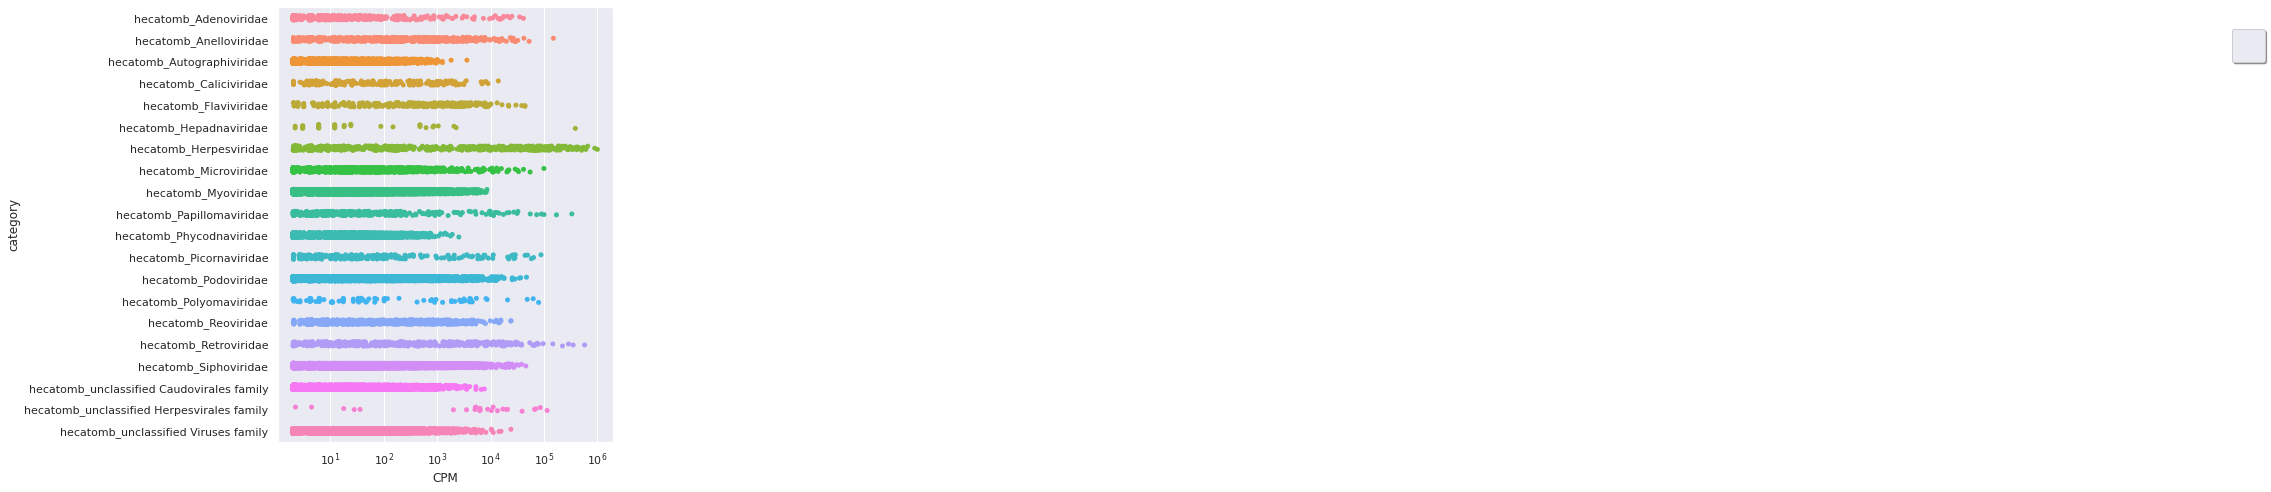

In [23]:
# plotting blah in log scale
sns.set_style("darkgrid")
sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(6,8)})
sns.stripplot(x="CPM",
                    y="category",
                    data=blah, jitter=0.1)
plt.gca().set_xscale('log') # log scale
plt.legend(bbox_to_anchor=(6.0,1), loc=0, borderaxespad=2,ncol=6, shadow=True, labelspacing=1.5, borderpad=1.5)
plt.show()
# herpeviridae is nicely distributed - not top heavy. thus doesn't indicate false positives.
#unclassified herpesviraes family - top heavy, could be false positives, also dist contributed by reference database issues (?)

FOCUS

focus - taxonomic ID and quantification of BACTERIA
WANT sampleID, family, CPM

In [24]:
focus = pd.read_csv('all.focus.csv.gz', compression= 'gzip', header=None, sep=',')
focus

,0,1,2,3,4,5,6,7,8,9,10
0,DRR014244,Bacteria,Aquificae,Aquificae,Aquificales,Aquificaceae,Thermocrinis,Thermocrinis_albus,Thermocrinis_albus_DSM_14484_uid46231,4.093897,4.055526
1,DRR014244,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanothermobacter,Methanothermobacter_thermautotrophicus,Methanothermobacter_thermautotrophicus_Delta_H...,20.560174,18.746343
2,DRR014244,Bacteria,Cyanobacteria,Unknown Class,Prochlorales,Prochlorococcaceae,Prochlorococcus,Prochlorococcus_marinus,Prochlorococcus_marinus_MIT_9313_uid57773,0.653645,0.000000
3,DRR014244,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Oxalobacteraceae,Candidatus_Zinderia,Candidatus_Zinderia_insecticola,Candidatus_Zinderia_insecticola_CARI_uid52459,0.399269,0.473624
4,DRR014244,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,Helicobacter_mustelae,Helicobacter_mustelae_12198_uid46647,0.889852,1.138496
...,...,...,...,...,...,...,...,...,...,...,...
393742,SRR7755274,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_sp._CF50,Bacteroides_CF50_uid222805,1.726208,0.000000
393743,SRR7755274,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Myxococcaceae,Myxococcus,Myxococcus_stipitatus,Myxococcus_stipitatus_DSM_14675_uid186549,0.635165,0.000000
393744,SRR7755274,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Selenomonas,Selenomonas_sputigena,Selenomonas_sputigena_ATCC_35185_uid55329,6.142898,4.055780
393745,SRR7755274,Bacteria,Proteobacteria,Gammaproteobacteria,Cardiobacteriales,Cardiobacteriaceae,Dichelobacter,Dichelobacter_nodosus,Dichelobacter_nodosus_VCS1703A_uid57643,0.247214,0.000000


In [25]:
#Add column titles
focus.columns = ['sampleID', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain', 'R1perc', 'R2perc']
#Make new column - Convert Rperc1 to CPM
focus["CPM"] = focus['R1perc']*10000
# rename 'family' to 'category'
focus.rename(columns = {'family':'category'}, inplace = True)
#Filter for bacterial hits - taking out archaea
focusfilt = focus[(focus.kingdom== 'Bacteria')]
# add prefix
dataFrameF = focusfilt.copy()
dataFrameF.category = 'focus_' + dataFrameF.category

ffocus= dataFrameF[['sampleID', 'category', 'CPM']]
ffocus

,sampleID,category,CPM
0,DRR014244,focus_Aquificaceae,40938.968023
2,DRR014244,focus_Prochlorococcaceae,6536.453886
3,DRR014244,focus_Oxalobacteraceae,3992.685313
4,DRR014244,focus_Helicobacteraceae,8898.524166
5,DRR014244,focus_Mycoplasmataceae,1035.571977
...,...,...,...
393742,SRR7755274,focus_Bacteroidaceae,17262.075461
393743,SRR7755274,focus_Myxococcaceae,6351.649279
393744,SRR7755274,focus_Veillonellaceae,61428.979163
393745,SRR7755274,focus_Cardiobacteriaceae,2472.140896


SFOCUS

sfocus - taxonomic ID via metabolic functions
WANT sampleID, Subsystem Level 3, CPM

In [27]:
sfocus  = pd.read_csv('all.superfocus.tsv.gz', compression='gzip', header=0, sep='\t')
sfocus

,sampleID,Subsystem Level 1,Subsystem Level 2,Subsystem Level 3,Function,R1 reads,R2 reads,R1 perc,R2 perc
0,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylaconitate_cis-trans_isomerase,24.833333,25.333333,0.008892,0.009090
1,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_(2-methyl-trans-ac...,1.700000,2.000000,0.000609,0.000718
2,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_FeS_dependent_(EC_...,37.700000,38.666667,0.013499,0.013874
3,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,4-hydroxyproline_epimerase_(EC_5.1.1.8),34.500000,36.500000,0.012353,0.013096
4,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,Alanine_racemase_(EC_5.1.1.1),79.000000,79.750000,0.028287,0.028615
...,...,...,...,...,...,...,...,...,...
50177510,SRR7755274,"Virulence, Disease and Defense",Invasion and intracellular resistance,MymA operon of Mycobacterium tuberculosis,Flavin-binding_family_monooxygenase,1.000000,0.000000,0.000913,0.000000
50177511,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Diphtheria toxin,diptheria_toxin_resistance_protein_required_fo...,0.250000,0.250000,0.000228,0.000233
50177512,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,ABC_transporter_ATP-binding_protein,0.000000,1.000000,0.000000,0.000933
50177513,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,Export_ABC_transporter_ATP-binding_protein,2.000000,0.000000,0.001825,0.000000


In [41]:
sfocus

,sampleID,Subsystem Level 1,Subsystem Level 2,Subsystem Level 3,Function,R1 reads,R2 reads,R1 perc,R2 perc,CPM
0,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylaconitate_cis-trans_isomerase,24.833333,25.333333,0.008892,0.009090,88.919762
1,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_(2-methyl-trans-ac...,1.700000,2.000000,0.000609,0.000718,6.087125
2,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,2-methylcitrate_dehydratase_FeS_dependent_(EC_...,37.700000,38.666667,0.013499,0.013874,134.990941
3,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,4-hydroxyproline_epimerase_(EC_5.1.1.8),34.500000,36.500000,0.012353,0.013096,123.532824
4,ERR1158198,Amino Acids and Derivatives,-,Amino acid racemase,Alanine_racemase_(EC_5.1.1.1),79.000000,79.750000,0.028287,0.028615,282.872263
...,...,...,...,...,...,...,...,...,...,...
50177510,SRR7755274,"Virulence, Disease and Defense",Invasion and intracellular resistance,MymA operon of Mycobacterium tuberculosis,Flavin-binding_family_monooxygenase,1.000000,0.000000,0.000913,0.000000,9.125336
50177511,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Diphtheria toxin,diptheria_toxin_resistance_protein_required_fo...,0.250000,0.250000,0.000228,0.000233,2.281334
50177512,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,ABC_transporter_ATP-binding_protein,0.000000,1.000000,0.000000,0.000933,0.000000
50177513,SRR7755274,"Virulence, Disease and Defense",Toxins and superantigens,Streptolysin S Biosynthesis and Transport,Export_ABC_transporter_ATP-binding_protein,2.000000,0.000000,0.001825,0.000000,18.250673


In [56]:
#Make new column - Convert Rperc1 to CPM
sfocus["CPM"] = sfocus['R1 perc']*10000
# collapse duplicate rows in category within sampleIDs
sfocusgroupO=sfocus.groupby(by=['sampleID', 'Subsystem Level 3'], as_index=False).agg('sum')
sfocusgroupO.rename(columns={'Subsystem Level 3':'category'}, inplace=True)
# add prefix
sfocusgroupO.category = 'super_' + sfocusgroupO.category
sfocusgroup = sfocusgroupO[['sampleID', 'category', 'CPM']]
sfocusgroup

,sampleID,category,CPM
0,DRR014244,super_2-O-alpha-mannosyl-D-glycerate utilization,52.826202
1,DRR014244,super_5-FCL-like protein,8941.337761
2,DRR014244,super_A Gram-positive cluster that relates rib...,158.478605
3,DRR014244,"super_ATP-dependent RNA helicases, bacterial",5493.924987
4,DRR014244,super_Acetyl-CoA biosynthesis in plants,74.837119
...,...,...,...
5731272,SRR7755274,super_tRNA nucleotidyltransferase,1032.683914
5731273,SRR7755274,super_tRNA processing,2150.494180
5731274,SRR7755274,super_tRNA-dependent amino acid transfers,27.376009
5731275,SRR7755274,super_tRNA-methylthiotransferase containing cl...,61.447883


AMRF

amrf - antimicrobial gene finder
**probs go for true or false**
WANT sampleID, Sequence name, AMR presence

*TO LOOK AT LATER - create tables for other element types, e.g. stress, biocide, virulence

In [26]:
amrf = pd.read_csv('all.amrfinder.tsv.gz', compression='gzip', header=0, sep='\t')
amrf

,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,Element subtype,...,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,NaN,ERR1356692:1:261704,1,123,-,dfrB5,trimethoprim-resistant dihydrofolate reductase...,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,41,78,52.56,92.68,41,WP_063844482.1,trimethoprim-resistant dihydrofolate reductase...,NaN,NaN
1,NaN,ERR1543789:16:20590,3,251,-,lnu(C),lincosamide nucleotidyltransferase Lnu(C),core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,83,164,50.61,96.39,83,WP_063851341.1,lincosamide nucleotidyltransferase Lnu(C),NaN,NaN
2,NaN,ERR1301981:5:3301,2,250,-,lnu(C),lincosamide nucleotidyltransferase Lnu(C),core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,83,164,50.61,98.80,83,WP_063851341.1,lincosamide nucleotidyltransferase Lnu(C),NaN,NaN
3,NaN,ERR1664649:16:12246,3,299,-,erm(37),23S rRNA (adenine(2058)-N(6))-methyltransferas...,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,99,179,55.31,100.00,99,WP_003900446.1,23S rRNA (adenine(2058)-N(6))-methyltransferas...,NaN,NaN
4,NaN,ERR1664649:21:8743,3,299,-,erm(37),23S rRNA (adenine(2058)-N(6))-methyltransferas...,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,99,179,55.31,100.00,99,WP_003900446.1,23S rRNA (adenine(2058)-N(6))-methyltransferas...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,NaN,SRR6659388:4:190877,1,249,+,fosA,FosA/FosA2 family fosfomycin resistance glutat...,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,83,141,58.87,92.77,83,WP_025205684.1,fosfomycin resistance glutathione transferase ...,NaN,NaN
461,NaN,DRR171218:145:9729,11,301,+,blaI,penicillinase repressor BlaI,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,97,126,76.98,98.97,97,WP_001284656.1,penicillinase repressor BlaI,NaN,NaN
462,NaN,DRR171218:200:8423,76,300,-,blaI,penicillinase repressor BlaI,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,75,126,59.52,100.00,75,WP_001284656.1,penicillinase repressor BlaI,NaN,NaN
463,NaN,SRR10025111:3:11025,3,149,-,crpP,ciprofloxacin resistance protein CrpP,core,AMR,AMR,...,PARTIAL_CONTIG_ENDX,49,65,75.38,95.92,49,WP_033179079.1,ciprofloxacin resistance protein CrpP,NaN,NaN


In [27]:
#rename contig id -> samppleID
amrf.rename(columns = {'Contig id':'sampleID'}, inplace = True)
#filter for AMR element type
amrffilt = amrf[(amrf['Element type'] == 'AMR')]
#split sampleID column into 3 columns
amrfID = amrffilt['sampleID'].str.split(':', expand=True)
amrfID.columns = ['sampleID', 'Counts', 'uniqueID']

#save unique sampleID that have AMR genes to list variable
amrID = amrfID.sampleID.unique()

In [28]:
# seeing unique sampleID
pd.unique(ffocus.sampleID)

array(['DRR014244', 'DRR014245', 'DRR014246', ..., 'SRR769044',
       'SRR7691720', 'SRR7755274'], dtype=object)

In [29]:
# making a dictionary so we can make a pd dataframe - of all unique sampleIDs for entire analysis
d={'sampleID':pd.unique(ffocus.sampleID)}

In [30]:
d

{'sampleID': array(['DRR014244', 'DRR014245', 'DRR014246', ..., 'SRR769044',
        'SRR7691720', 'SRR7755274'], dtype=object)}

In [31]:
#creating pd.df from the dicitionary
AMRpresence = pd.DataFrame(data=d)

In [32]:
AMRpresence
#Technically all our unique sampleIDs

,sampleID
0,DRR014244
1,DRR014245
2,DRR014246
3,DRR014247
4,DRR021439
...,...
9225,SRR7686972
9226,SRR7687733
9227,SRR769044
9228,SRR7691720


In [33]:
#adding a column for whether or not AMR gene present(this is just making a column of 'false' values for now)
AMRpresence['amr']=False

In [34]:
#return rows for the sampleID that are in list (amrID) and update amr column in AMRpresence to be True
AMRpresence.loc[AMRpresence['sampleID'].isin(amrID),'amr']=True

In [35]:
AMRpresence

,sampleID,amr
0,DRR014244,False
1,DRR014245,False
2,DRR014246,False
3,DRR014247,False
4,DRR021439,False
...,...,...
9225,SRR7686972,False
9226,SRR7687733,False
9227,SRR769044,False
9228,SRR7691720,False


In [36]:
# only shows amr true in AMRpresence - checking that it worked
AMRpresence.loc[AMRpresence['sampleID'].isin(amrID)]

,sampleID,amr
21,DRR099839,True
29,ERR1007609,True
346,ERR1099286,True
589,ERR1301978,True
590,ERR1301981,True
...,...,...
9015,SRR7286035,True
9120,SRR7510637,True
9209,SRR7642172,True
9210,SRR7642174,True


Concatenating to prepare for correlation, and long read table is used for one-way ANOVA

In [37]:
#concat = pd.concat([fbvirus, ffocus, AMRpresence])
concat = pd.concat([fbvirus,ffocus])
concat = pd.merge(concat,AMRpresence,on='sampleID',how='inner')
concatCleaned = concat

In [43]:
#concatCleaned = concat.groupby(['category','amr']).sum('CPM')
#concatCleaned = concatCleaned.reset_index()
concatCleaned['logCPM']=concatCleaned.apply(lambda x: log(x['CPM']+1), axis=1)

In [44]:
concatCleaned

,sampleID,category,CPM,amr,logCPM
0,DRR046624,hecatomb_Flaviviridae,6172.839506,False,8.728076
1,DRR046624,focus_Aquificaceae,29335.201477,False,10.286578
2,DRR046624,focus_Prochlorococcaceae,72889.551082,False,11.196714
3,DRR046624,focus_Helicobacteraceae,0.000000,False,0.000000
4,DRR046624,focus_Unknown Family,12054.152384,False,9.397247
...,...,...,...,...,...
351869,SRR7691720,focus_Moraxellaceae,1876.584421,False,7.537741
351870,SRR7691720,focus_Desulfovibrionaceae,3192.105882,False,8.068749
351871,SRR7691720,focus_Nitrosomonadaceae,13725.682346,False,9.527097
351872,SRR7691720,focus_Streptococcaceae,30353.773460,False,10.320709


In [45]:
stats.normaltest(concatCleaned['logCPM'])

NormaltestResult(statistic=47074.2370525776, pvalue=0.0)

In [60]:
#concat["amr"].fillna(False,inplace=True)
#concatCleaned = concat[concat['CPM']>=0]
#concatCleaned = concat

In [1]:
model = ols('CPM ~ C(category) + C(amr) + C(category):C(amr)', data=concatCleaned).fit()

NameError: name 'ols' is not defined

In [114]:
sm.stats.anova_lm(model, typ=2)

/home/cram0056/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 217, but rank is 201
  warnings.warn('covariance of constraints does not have full '
/home/cram0056/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 217, but rank is 201
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(category),7.745856e+13,217.0,199.590218,0.000000e+00
C(amr),1.323927e+11,1.0,74.027604,7.736034e-18
C(category):C(amr),2.585297e+12,217.0,6.661628,8.509761e-167
Residual,5.918949e+14,330959.0,NaN,NaN


In [30]:
# creating wide table for pearson correlation analysis
outmatrix = concat.pivot_table(index='sampleID', columns='category', values='CPM', fill_value=0)

In [31]:
outmatrix

category,focus_Acetobacteraceae,focus_Acholeplasmataceae,focus_Acidaminococcaceae,focus_Acidimicrobiaceae,focus_Acidithiobacillaceae,focus_Acidobacteriaceae,focus_Acidothermaceae,focus_Actinomycetaceae,focus_Aerococcaceae,focus_Aeromonadaceae,...,super_tRNA modification Archaea,super_tRNA modification yeast cytoplasmic,super_tRNA modification yeast mitochondrial,super_tRNA mods Archaea,super_tRNA nucleotidyltransferase,super_tRNA processing,super_tRNA splicing,super_tRNA-dependent amino acid transfers,super_tRNA-methylthiotransferase containing cluster,super_trimethylamine N-oxide (TMAO) reductase
sampleID,,,,,,,,,,,,,,,,,,,,,
DRR014244,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,202.423577,145.272055,26.413101,220.355963,48.424018,213.456986,0.000000,0.000000,0.000000,0.000000
DRR014245,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,206.094368,226.027762,79.774504,248.303100,0.000000,252.176071,0.000000,0.000000,0.000000,0.000000
DRR014246,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,224.709115,132.058528,13.205853,233.703577,13.205853,199.320339,0.000000,0.000000,0.000000,0.000000
DRR014247,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,191.294182,105.235464,210.470929,228.878277,0.000000,197.024175,0.000000,0.000000,0.000000,0.000000
DRR021439,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,36.063695,145.491958,117.172987,214.759809,28.578777,185.762053,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7687733,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,62.928061,0.000000,109.032962,58.058878,240.431659,104.178580,0.000000,54.843253,3.494646,5.591434
SRR769044,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,123.068869,0.000000,371.267914,99.952348,364.517588,188.665978,0.000000,842.665659,0.000000,1.125054
SRR7690497,0.0,0.00000,0.000000,0.0,0.0,22607.988711,0.0,0.0,0.0,0.0,...,48.605576,7.036619,300.756036,48.836237,72.632321,59.064770,10.553797,21.103066,16.438131,13.187718


In [28]:
# saving to a file for pearson correlation run on deepthought node (NEED to collect all the scripts on it)
outmatrix.to_csv('Family_subsys3.tsv', sep='\t')

In [60]:
final = concat.merge(AMRpresence, on='sampleID', how='inner')

ValueError: The column label 'sampleID' is not unique.

In [33]:
final

,sampleID,category,CPM,amr
0,DRR046624,hecatomb_Flaviviridae,6172.839506,False
1,DRR046624,focus_Aquificaceae,29335.201477,False
2,DRR046624,focus_Prochlorococcaceae,72889.551082,False
3,DRR046624,focus_Helicobacteraceae,0.000000,False
4,DRR046624,focus_Unknown Family,12054.152384,False
...,...,...,...,...
50529384,SRR7691720,super_MLST,91.787101,False
50529385,SRR7691720,super_Listeria surface proteins: Internalin-li...,7.015575,False
50529386,SRR7691720,super_Listeria surface proteins: Internalin-li...,7.015575,False
50529387,SRR7691720,super_Streptolysin S Biosynthesis and Transport,0.000000,False


In [ ]:
for i in final['category'].unique():
    print(i)
    print(posthoc_dunn(final[final['category']==i], val_col = 'CPM', group_col = 'amr'))
    print('\n')
done > untitled.txt

hecatomb_Flaviviridae
         False     True
False  1.00000  0.57615
True   0.57615  1.00000


focus_Aquificaceae
              False          True
False  1.000000e+00  1.391749e-24
True   1.391749e-24  1.000000e+00


focus_Prochlorococcaceae
         False     True
False  1.00000  0.01381
True   0.01381  1.00000


focus_Helicobacteraceae
              False          True
False  1.000000e+00  6.379994e-17
True   6.379994e-17  1.000000e+00


focus_Unknown Family
              False          True
False  1.000000e+00  1.793372e-43
True   1.793372e-43  1.000000e+00


focus_Deinococcaceae
          False      True
False  1.000000  0.000083
True   0.000083  1.000000


focus_Thermaceae
              False          True
False  1.000000e+00  3.826091e-32
True   3.826091e-32  1.000000e+00


focus_Thermodesulfobiaceae
              False          True
False  1.000000e+00  4.334787e-13
True   4.334787e-13  1.000000e+00


focus_Thermotogaceae
          False      True
False  1.000000  0.116205
Tru